In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import datetime as dt
import re
from collections import Counter
import math
import warnings # Turn off warnings
warnings.filterwarnings('ignore')

# Imports

In [3]:
petition_df = pd.read_csv("/home/harrisonized/Data/SF Open Data/Petitions_to_the_Rent_Board_unique.csv") # 40749 rows
petition_df['Datetime'] = petition_df['Date'].apply(lambda x : dt.datetime.strptime(x, "%m/%d/%Y"))
petition_df['Timestamp'] = petition_df['Date'].apply(lambda x : mdates.datestr2num(x))

In [3]:
unemployment_df = pd.read_csv("/home/harrisonized/Data/stlouisfed/CASANF0URN.csv") # 352 rows
unemployment_df = unemployment_df.rename(columns = {"CASANF0URN": "Rate"})
unemployment_df['Datetime'] = unemployment_df['DATE'].apply(lambda x : dt.datetime.strptime(x, "%Y-%m-%d"))
unemployment_df = unemployment_df.set_index("Datetime").drop(columns = "DATE")

In [4]:
petition_df.columns

Index(['Date', 'Address', 'latlong', 'Zip Code', 'Neighborhood Number',
       'Neighborhood Name', 'SF Find Neighborhoods',
       'Current Police Districts', 'Current Supervisor Districts',
       'Supervisor District', 'Filing Party',
       'Ground (landlord): Capital Improvement',
       'Ground (landlord): Comparable Rents',
       'Ground (landlord): Extension of Time for Capital Improvements',
       'Ground (landlord): Intent to Withdraw (Ellis)',
       'Ground (landlord): Other',
       'Ground (landlord): Operating & Maintenance',
       'Ground (landlord): Substantial Rehabilitation',
       'Ground (landlord):  Costa-Hawkins', 'Ground (landlord):  Exemption',
       'Ground (landlord): Rules and Regulations Section 1.21',
       'Ground (landlord): Rules and Regulations Section 6.14',
       'Ground (landlord): Rules and Regulations Section 6.15',
       'Ground (landlord): SRO Hotel Vistor Policy Petition',
       'Ground (landlord): Utility Passthrough Petition',
      

In [17]:
petition_df.columns[11:43]

Index(['Ground (landlord): Capital Improvement',
       'Ground (landlord): Comparable Rents',
       'Ground (landlord): Extension of Time for Capital Improvements',
       'Ground (landlord): Intent to Withdraw (Ellis)',
       'Ground (landlord): Other',
       'Ground (landlord): Operating & Maintenance',
       'Ground (landlord): Substantial Rehabilitation',
       'Ground (landlord):  Costa-Hawkins', 'Ground (landlord):  Exemption',
       'Ground (landlord): Rules and Regulations Section 1.21',
       'Ground (landlord): Rules and Regulations Section 6.14',
       'Ground (landlord): Rules and Regulations Section 6.15',
       'Ground (landlord): SRO Hotel Vistor Policy Petition',
       'Ground (landlord): Utility Passthrough Petition',
       'Ground (landlord): Owner Move-In Disability Determination',
       'Ground (landlord): Utility Passthrough Worksheet',
       'Ground (landlord): Non-Comparable Rents',
       'Ground (tenant): Decrease in Housing Services',
       'Gro

In [24]:
petition_ground_count_list = []
for i in petition_df.columns[10:43]:
    petition_ground_count_list.append(petition_df[[i]][petition_df[i] == True].count()[0])

In [39]:
list(petition_df.columns[10:43])[1:18]

['Ground (landlord): Capital Improvement',
 'Ground (landlord): Comparable Rents',
 'Ground (landlord): Extension of Time for Capital Improvements',
 'Ground (landlord): Intent to Withdraw (Ellis)',
 'Ground (landlord): Other',
 'Ground (landlord): Operating & Maintenance',
 'Ground (landlord): Substantial Rehabilitation',
 'Ground (landlord):  Costa-Hawkins',
 'Ground (landlord):  Exemption',
 'Ground (landlord): Rules and Regulations Section 1.21',
 'Ground (landlord): Rules and Regulations Section 6.14',
 'Ground (landlord): Rules and Regulations Section 6.15',
 'Ground (landlord): SRO Hotel Vistor Policy Petition',
 'Ground (landlord): Utility Passthrough Petition',
 'Ground (landlord): Owner Move-In Disability Determination',
 'Ground (landlord): Utility Passthrough Worksheet',
 'Ground (landlord): Non-Comparable Rents']

In [42]:
sum(petition_ground_count_list[1:18]) # Landlord Grounds

13041

In [49]:
sum(petition_ground_count_list[18:32]) # Tenant Grounds

28534

In [50]:
petition_ground_count_list[32] # Alternative Dispute Resolution

886

In [51]:
list(petition_df.columns[10:43])[32]

'Ground: Alternative Dispute Resolution'

In [52]:
11108/28534

0.3892899698605173

In [27]:
dict(zip(list(petition_df.columns[10:43]), petition_ground_count_list))

{'Filing Party': 0,
 'Ground (landlord): Capital Improvement': 6042,
 'Ground (landlord): Comparable Rents': 216,
 'Ground (landlord): Extension of Time for Capital Improvements': 249,
 'Ground (landlord): Intent to Withdraw (Ellis)': 1765,
 'Ground (landlord): Other': 620,
 'Ground (landlord): Operating & Maintenance': 997,
 'Ground (landlord): Substantial Rehabilitation': 18,
 'Ground (landlord):  Costa-Hawkins': 599,
 'Ground (landlord):  Exemption': 0,
 'Ground (landlord): Rules and Regulations Section 1.21': 1179,
 'Ground (landlord): Rules and Regulations Section 6.14': 0,
 'Ground (landlord): Rules and Regulations Section 6.15': 4,
 'Ground (landlord): SRO Hotel Vistor Policy Petition': 0,
 'Ground (landlord): Utility Passthrough Petition': 890,
 'Ground (landlord): Owner Move-In Disability Determination': 0,
 'Ground (landlord): Utility Passthrough Worksheet': 462,
 'Ground (landlord): Non-Comparable Rents': 0,
 'Ground (tenant): Decrease in Housing Services': 8992,
 'Ground (t

In [4]:
# Get count data by using groupby
petition_day_count_df = petition_df[['Petition ID Len', 'Datetime']].groupby(pd.TimeGrouper("D", key="Datetime")).count()
petition_week_count_df = petition_df[['Petition ID Len', 'Datetime']].groupby(pd.TimeGrouper("W", key="Datetime")).count()
petition_month_count_df = petition_df[['Petition ID Len', 'Datetime']].groupby(pd.TimeGrouper("M", key="Datetime")).count()

In [5]:
# Get distribution of counts
petition_day_counts_df = pd.DataFrame(petition_day_count_df['Petition ID Len'].value_counts().sort_index())
petition_week_counts_df = pd.DataFrame(petition_week_count_df['Petition ID Len'].value_counts().sort_index())
petition_month_counts_df = pd.DataFrame(petition_month_count_df['Petition ID Len'].value_counts().sort_index())

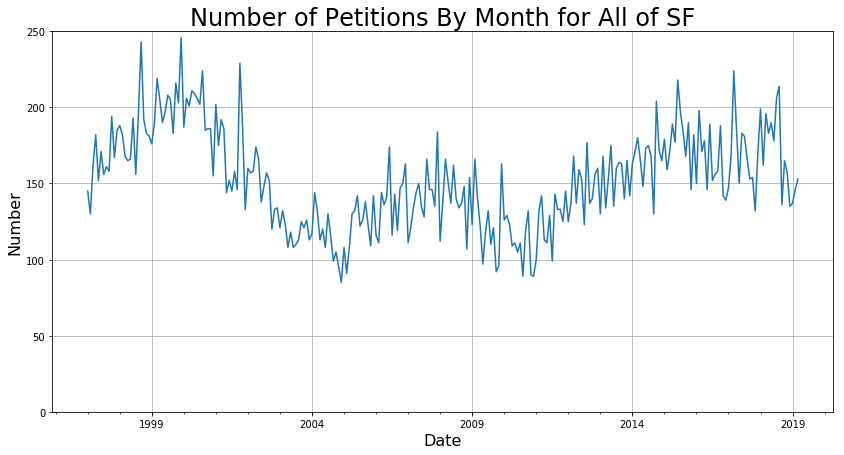

In [92]:
# Month, large
petition_month_count_df.plot(kind="line", color='#1f77b4', figsize = (14,7), legend = None)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Number', fontsize=16)
plt.ylim(0, 250)
plt.title('Number of Petitions By Month for All of SF', fontsize=24)
plt.grid(True)
plt.savefig("Figures/Number of Petitions By Month.png", transparent=True, bbox_inches="tight")
plt.show()

# Neighborhood Number

In [93]:
neighborhood_dict = {}

for i in range(1, 27):
    neighborhood_dict[i] = petition_df[['Neighborhood Number', 'Neighborhood Name']] \
        [petition_df['Neighborhood Number'] == i].mode()['Neighborhood Name'][0]

for i in range(28, 42):
    neighborhood_dict[i] = petition_df[['Neighborhood Number', 'Neighborhood Name']] \
        [petition_df['Neighborhood Number'] == i].mode()['Neighborhood Name'][0]

neighborhood_dict

{1: 'Bayview Hunters Point',
 2: 'Bernal Heights',
 3: 'Haight Ashbury',
 4: 'Mission Bay',
 5: 'Castro/Upper Market',
 6: 'Chinatown',
 7: 'Excelsior',
 8: 'Financial District/South Beach',
 9: 'Hayes Valley',
 10: 'Glen Park',
 11: 'Inner Richmond',
 12: 'Golden Gate Park',
 13: 'Marina',
 14: 'Inner Sunset',
 15: 'Japantown',
 16: 'Lakeshore',
 17: 'Lincoln Park',
 18: 'Lone Mountain/USF',
 19: 'McLaren Park',
 20: 'Mission',
 21: 'Nob Hill',
 22: 'Noe Valley',
 23: 'North Beach',
 24: 'Oceanview/Merced/Ingleside',
 25: 'Portola',
 26: 'Potrero Hill',
 28: 'Outer Mission',
 29: 'Outer Richmond',
 30: 'Pacific Heights',
 31: 'Presidio Heights',
 32: 'Russian Hill',
 33: 'Seacliff',
 34: 'South of Market',
 35: 'Sunset/Parkside',
 36: 'Tenderloin',
 37: 'Treasure Island',
 38: 'Twin Peaks',
 39: 'Western Addition',
 40: 'Visitacion Valley',
 41: 'West of Twin Peaks'}

In [108]:
# Collect all count results

petition_counts_by_neighborhood_df = petition_df[petition_df['Neighborhood Number'] == 1] \
    [['Petition ID Len', 'Datetime']] \
    .groupby(pd.TimeGrouper("M", key="Datetime")).count().rename(columns = {"Petition ID Len": neighborhood_dict[1]})

for i in range(2, 27):
    petition_counts_by_neighborhood_df[neighborhood_dict[i]] = petition_df[petition_df['Neighborhood Number'] == i] \
        [['Petition ID Len', 'Datetime']] \
        .groupby(pd.TimeGrouper("M", key="Datetime")).count().fillna(0)
    
for i in range(28, 42):
    petition_counts_by_neighborhood_df[neighborhood_dict[i]] = petition_df[petition_df['Neighborhood Number'] == i] \
        [['Petition ID Len', 'Datetime']] \
        .groupby(pd.TimeGrouper("M", key="Datetime")).count().fillna(0)
    
petition_counts_by_neighborhood_df

,Bayview Hunters Point,Bernal Heights,Haight Ashbury,Mission Bay,Castro/Upper Market,Chinatown,Excelsior,Financial District/South Beach,Hayes Valley,Glen Park,...,Russian Hill,Seacliff,South of Market,Sunset/Parkside,Tenderloin,Treasure Island,Twin Peaks,Western Addition,Visitacion Valley,West of Twin Peaks
Datetime,,,,,,,,,,,,,,,,,,,,,
1997-01-31,2,5,6,NaN,6,NaN,1,1,7,NaN,...,6,NaN,1.0,5,13,NaN,2,7,NaN,1
1997-02-28,2,5,3,NaN,8,NaN,3,0,8,1.0,...,7,NaN,2.0,3,8,NaN,0,2,2.0,3
1997-03-31,5,6,10,NaN,12,NaN,3,1,13,0.0,...,4,NaN,2.0,11,6,NaN,4,5,1.0,3
1997-04-30,3,3,6,NaN,10,2.0,2,1,3,2.0,...,3,NaN,2.0,7,14,NaN,4,1,0.0,4
1997-05-31,1,5,7,NaN,6,1.0,5,0,10,0.0,...,5,NaN,2.0,9,8,NaN,3,1,3.0,1
1997-06-30,4,7,5,NaN,4,0.0,2,0,12,1.0,...,5,NaN,1.0,7,17,NaN,6,6,2.0,3
1997-07-31,1,7,6,NaN,8,0.0,5,0,9,2.0,...,9,NaN,3.0,6,11,NaN,4,4,1.0,0
1997-08-31,3,6,7,NaN,17,4.0,3,2,11,1.0,...,6,NaN,6.0,8,5,NaN,0,1,1.0,1
1997-09-30,2,4,9,NaN,12,2.0,6,2,9,1.0,...,6,NaN,0.0,12,8,NaN,1,4,1.0,6


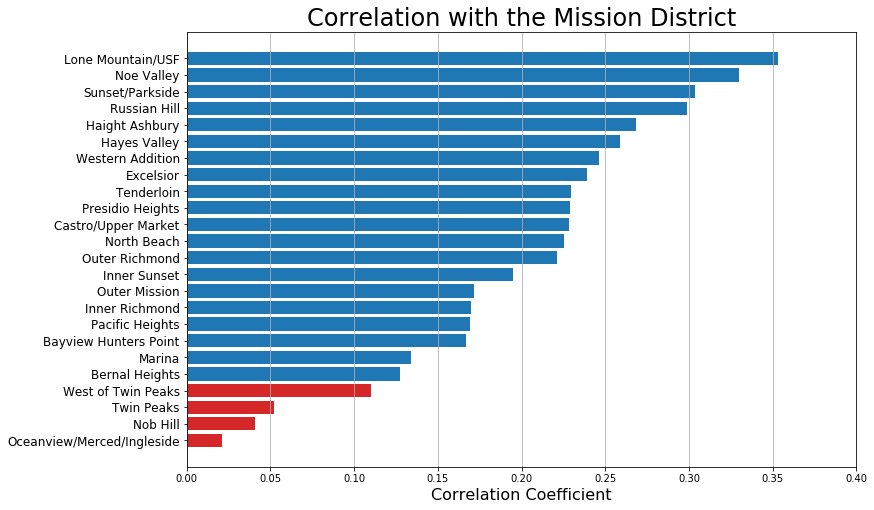

In [109]:
# Correlations with the Mission District

features_list = list(petition_counts_by_neighborhood_df.dropna(axis = 1).corr()[neighborhood_dict[20]].sort_values().index)
correlation_list = list(petition_counts_by_neighborhood_df.dropna(axis = 1).corr()[neighborhood_dict[20]].sort_values())
features_correlation_dict = dict(zip(features_list, correlation_list))

# Highlight colors below threwshold
my_colors = []
for i in correlation_list:
    if i >= 0.11:
        my_colors.append('#1f77b4') # Blue
    else:
        my_colors.append('#d62728') # Red

fig, ax = plt.subplots(figsize=(12, 8))
y_pos = np.arange(len(correlation_list)-2)
ax.barh(y_pos, correlation_list[1:-1], align='center', capsize=3, color = my_colors)
ax.set_xlabel('Correlation Coefficient', fontsize=16)
ax.set_xlim(left = 0, right = 0.4)
ax.set_yticks(y_pos)
ax.set_yticklabels(features_list[1:-1], fontsize=12)
ax.set_title('Correlation with the Mission District', fontsize=24)
ax.xaxis.grid(True)
plt.savefig('Figures/Correlation with Mission District.png', transparent = True, bbox_inches = 'tight')

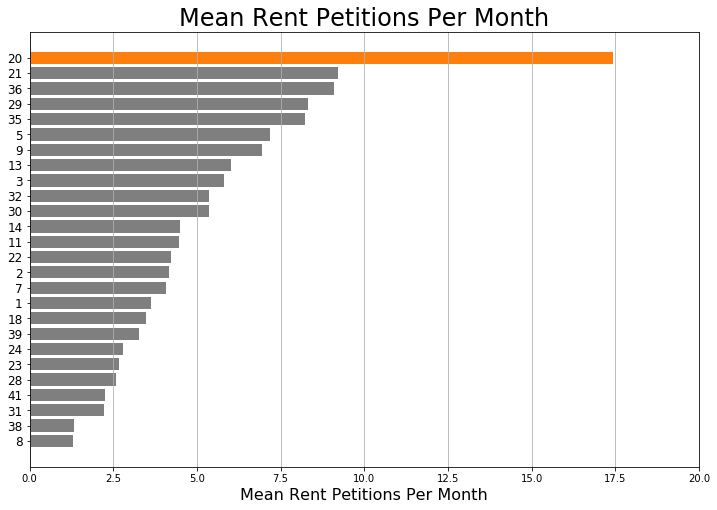

In [106]:
# Number of Rent Petitions by Neighborhood
features_list = list(petition_counts_by_neighborhood_df.dropna(axis = 1).mean(axis = 0).sort_values().index)
mean_count_list = list(petition_counts_by_neighborhood_df.dropna(axis = 1).mean(axis = 0).sort_values())

my_colors = ['#ff7f0e']
for i in range(len(mean_count_list)-1):
    my_colors.append('#7f7f7f')
my_colors = my_colors[::-1]

fig, ax = plt.subplots(figsize=(12, 8))
y_pos = np.arange(len(mean_count_list))
ax.barh(y_pos, mean_count_list, align='center', capsize=3, color = my_colors)
ax.set_xlabel('Mean Rent Petitions Per Month', fontsize=16)
ax.set_xlim(left = 0, right = 20)
ax.set_yticks(y_pos)
ax.set_yticklabels(features_list, fontsize=12)
ax.set_title('Mean Rent Petitions Per Month', fontsize=24)
ax.xaxis.grid(True)
plt.savefig('Figures/Mean Rent Petitions Per Month by Neighborhood.png', transparent = True, bbox_inches = 'tight')

In [99]:
# Bad
print(neighborhood_dict[8])
print(neighborhood_dict[21])
print(neighborhood_dict[24])
print(neighborhood_dict[38])
print(neighborhood_dict[41])

Financial District/South Beach
Nob Hill
Oceanview/Merced/Ingleside
Twin Peaks
West of Twin Peaks


# Grouping Neighborhoods

In [113]:
# Collect all count results

petition_counts_by_neighborhood_df = petition_df[petition_df['Neighborhood Number'] == 1] \
    [['Petition ID Len', 'Datetime']] \
    .groupby(pd.TimeGrouper("M", key="Datetime")).count().rename(columns = {"Petition ID Len": 1})

for i in range(2, 27):
    petition_counts_by_neighborhood_df[i] = petition_df[petition_df['Neighborhood Number'] == i] \
        [['Petition ID Len', 'Datetime']] \
        .groupby(pd.TimeGrouper("M", key="Datetime")).count().fillna(0)
    
for i in range(28, 42):
    petition_counts_by_neighborhood_df[i] = petition_df[petition_df['Neighborhood Number'] == i] \
        [['Petition ID Len', 'Datetime']] \
        .groupby(pd.TimeGrouper("M", key="Datetime")).count().fillna(0)
    
petition_counts_by_neighborhood_df

,1,2,3,4,5,6,7,8,9,10,...,32,33,34,35,36,37,38,39,40,41
Datetime,,,,,,,,,,,,,,,,,,,,,
1997-01-31,2,5,6,NaN,6,NaN,1,1,7,NaN,...,6,NaN,1.0,5,13,NaN,2,7,NaN,1
1997-02-28,2,5,3,NaN,8,NaN,3,0,8,1.0,...,7,NaN,2.0,3,8,NaN,0,2,2.0,3
1997-03-31,5,6,10,NaN,12,NaN,3,1,13,0.0,...,4,NaN,2.0,11,6,NaN,4,5,1.0,3
1997-04-30,3,3,6,NaN,10,2.0,2,1,3,2.0,...,3,NaN,2.0,7,14,NaN,4,1,0.0,4
1997-05-31,1,5,7,NaN,6,1.0,5,0,10,0.0,...,5,NaN,2.0,9,8,NaN,3,1,3.0,1
1997-06-30,4,7,5,NaN,4,0.0,2,0,12,1.0,...,5,NaN,1.0,7,17,NaN,6,6,2.0,3
1997-07-31,1,7,6,NaN,8,0.0,5,0,9,2.0,...,9,NaN,3.0,6,11,NaN,4,4,1.0,0
1997-08-31,3,6,7,NaN,17,4.0,3,2,11,1.0,...,6,NaN,6.0,8,5,NaN,0,1,1.0,1
1997-09-30,2,4,9,NaN,12,2.0,6,2,9,1.0,...,6,NaN,0.0,12,8,NaN,1,4,1.0,6


In [114]:
good_neighborhoods_list = petition_counts_by_neighborhood_df.dropna(axis = 1).drop(columns = [8, 21, 24, 38, 41]).columns
bad_neighborhoods_list = sorted(list(set(petition_counts_by_neighborhood_df.columns).difference(set(good_neighborhoods_list))))
na_neighborhoods_list = sorted(list(set(petition_counts_by_neighborhood_df.columns).difference(set(petition_counts_by_neighborhood_df.dropna(axis = 1)))))

In [115]:
good_neighborhoods_list

Int64Index([1, 2, 3, 5, 7, 9, 11, 13, 14, 18, 20, 22, 23, 28, 29, 30, 31, 32,
            35, 36, 39],
           dtype='int64')

In [116]:
bad_neighborhoods_list

[4, 6, 8, 10, 12, 15, 16, 17, 19, 21, 24, 25, 26, 33, 34, 37, 38, 40, 41]

# Separating Time-Varying from Stationary Neighborhoods

In [117]:
petition_month_count_clean_ser = petition_counts_by_neighborhood_df[good_neighborhoods_list].sum(axis=1)

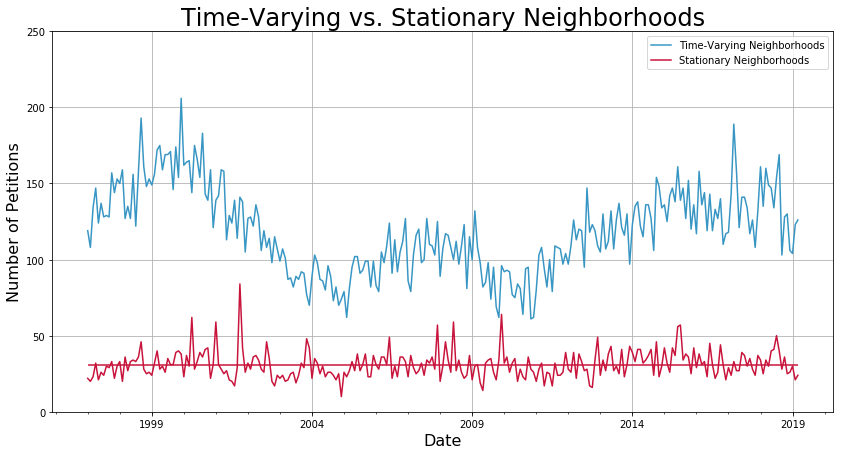

In [119]:
# Combined Distributions
fig, ax = plt.subplots(figsize=(14, 7))
petition_month_count_clean_ser.plot(kind="line", color='#3896c4', label = 'Time-Varying Neighborhoods')
petition_counts_by_neighborhood_df[bad_neighborhoods_list].sum(axis=1).plot(kind="line", label = 'Stationary Neighborhoods', color = '#c8133b')
plt.hlines(y=petition_counts_by_neighborhood_df[bad_neighborhoods_list].sum(axis=1).mean(), xmin=min(petition_month_count_clean_ser.index), xmax=max(petition_month_count_clean_ser.index), color = '#c8133b')
plt.ylim(0, 250)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Number of Petitions', fontsize=16)
plt.legend(loc = 'upper right')
ax.grid(True)
plt.title('Time-Varying vs. Stationary Neighborhoods', fontsize=24)
plt.savefig("Figures/Time-Varying vs Stationary Neighborhoods.png", transparent=True, bbox_inches="tight")

# Checking Supervisor Districts

In [21]:
neighborhood_supervisor_dict = {}

for i in range(1, 27):
    neighborhood_supervisor_dict[i] = petition_df[['Neighborhood Number', 'Supervisor District']] \
        [petition_df['Neighborhood Number'] == i].mode()['Supervisor District'][0]

for i in range(28, 42):
    neighborhood_supervisor_dict[i] = petition_df[['Neighborhood Number', 'Supervisor District']] \
        [petition_df['Neighborhood Number'] == i].mode()['Supervisor District'][0]

neighborhood_supervisor_dict

{1: 10.0,
 2: 9.0,
 3: 5.0,
 4: 6.0,
 5: 8.0,
 6: 3.0,
 7: 11.0,
 8: 3.0,
 9: 5.0,
 10: 8.0,
 11: 1.0,
 12: 5.0,
 13: 2.0,
 14: 5.0,
 15: 5.0,
 16: 7.0,
 17: 1.0,
 18: 5.0,
 19: 10.0,
 20: 9.0,
 21: 3.0,
 22: 8.0,
 23: 3.0,
 24: 11.0,
 25: 9.0,
 26: 10.0,
 28: 11.0,
 29: 1.0,
 30: 2.0,
 31: 2.0,
 32: 3.0,
 33: 2.0,
 34: 6.0,
 35: 4.0,
 36: 6.0,
 37: 6.0,
 38: 8.0,
 39: 5.0,
 40: 10.0,
 41: 7.0}

In [22]:
set([neighborhood_supervisor_dict[i] for i in bad_neighborhoods_list])

{1.0, 2.0, 3.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0}

In [23]:
petition_counts_by_district_df = petition_df[petition_df['Current Supervisor Districts'] == 1] \
    [['Petition ID Len', 'Datetime']] \
    .groupby(pd.TimeGrouper("M", key="Datetime")).count().rename(columns = {"Petition ID Len": 1})

for i in range(2, 12):
    petition_counts_by_district_df[i] = petition_df[petition_df['Current Supervisor Districts'] == i] \
        [['Petition ID Len', 'Datetime']] \
        .groupby(pd.TimeGrouper("M", key="Datetime")).count()
    
petition_counts_by_district_df

,1,2,3,4,5,6,7,8,9,10,11
Datetime,,,,,,,,,,,
1997-01-31,5,23,17,11,16,12,5,9,5,14,24
1997-02-28,5,14,13,10,22,10,3,7,9,16,19
1997-03-31,8,22,14,8,30,15,11,5,6,9,29
1997-04-30,6,25,20,15,33,23,7,9,7,17,17
1997-05-31,10,12,17,11,23,18,9,3,4,11,27
1997-06-30,2,18,17,17,22,16,7,7,9,18,30
1997-07-31,11,19,17,9,30,15,6,6,4,13,22
1997-08-31,6,18,20,9,29,22,8,2,5,12,28
1997-09-30,6,14,15,15,27,16,12,11,5,9,27


In [24]:
petition_counts_by_district_df.corr().mean(axis=1)

1     0.301280
2     0.352007
3     0.253398
4     0.358585
5     0.367490
6     0.357169
7     0.330571
8     0.092822
9     0.320521
10    0.289391
11    0.388708
dtype: float64

In [25]:
petition_df[petition_df['Current Supervisor Districts'] == 8]['Neighborhood Name'].value_counts()

Lakeshore                     761
West of Twin Peaks            572
Inner Sunset                  476
Oceanview/Merced/Ingleside    133
Sunset/Parkside                35
Twin Peaks                     16
Name: Neighborhood Name, dtype: int64

In [26]:
na_neighborhoods_list

[4, 6, 10, 12, 15, 16, 17, 19, 25, 26, 33, 34, 37, 40]

In [27]:
petition_counts_by_neighborhood_df[na_neighborhoods_list].corr().mean(axis=1)

4     0.110976
6     0.114940
10    0.071735
12    0.056702
15    0.095078
16    0.022175
17    0.137285
19    0.132400
25    0.124698
26    0.140170
33    0.116087
34    0.087710
37    0.168098
40    0.068741
dtype: float64